# Mašinsko učenje
## Projekat 1 - Nadgledano učenje
### Nikola Vukotić 1401,  Željko Balanović 1533
### Prognoza rizika od dijabetesa
#### Dataset: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
#### Klasifikacija
#### Google Search : diabetes site:archive.ics.uci.edu/ml site:ics.uci.edu

In [77]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sn
import math
import statistics
import scipy.stats

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from statistics import mean
from scipy.stats import uniform


In [3]:
data_df = pd.read_csv('diabetes_data.csv')

In [4]:
data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
data_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
data_df.shape

(520, 17)

In [7]:
result = scipy.stats.describe(data_df["Age"], ddof=1, bias=False)
result

DescribeResult(nobs=520, minmax=(16, 90), mean=48.02884615384615, variance=147.65812583370388, skewness=0.3293593578272701, kurtosis=-0.19170941407070163)

In [8]:
data_df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [9]:
data_df.count()

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
class                 520
dtype: int64

In [10]:
print('Maximum of column Age: ', data_df['Age'].max())
print('Minimum of column Age: ', data_df['Age'].min())
print('Mean of column Age: ', data_df['Age'].mean())
print('Count of column Age: ', data_df['Age'].count())

Maximum of column Age:  90
Minimum of column Age:  16
Mean of column Age:  48.02884615384615
Count of column Age:  520


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

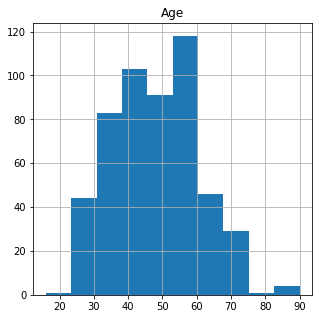

In [11]:
data_df.hist(figsize = (5,5))

## Konsultacije: 30.11.2022.
### balansiranje podataka obavezno proveriti
### OUTLIERI - pronaci i videti kako ih se resiti
### problem: mala kolicina podataka, za kasnije faze moze biti problem, da se shvati
### koji algoritam daje najbolje resenje, takodje moze biti problematicno kod redukcije feature-a
### -------------------------------------------------------------------------------------------------------------------------------------------

### Obrada kategorickih podataka

In [12]:
data_df['Gender'] = [1 if gender=='Male' else 0 for gender in data_df.Gender]
data_df['class'] = [1 if class_att=='Positive' else 0 for class_att in data_df.get('class')]

columns_name = list(data_df)
columns_name = columns_name[2:16]

for col in columns_name:
    data_df[col] = [1 if b=='Yes' else 0 for b in data_df.get(col)]

data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Obrada nedostajucih podataka - Zakljucak: nema takvih:

In [13]:
missing = data_df.isna()
missing

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
missing.sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [15]:
anymissing = missing.any(axis=1)
anymissing

0      False
1      False
2      False
3      False
4      False
       ...  
515    False
516    False
517    False
518    False
519    False
Length: 520, dtype: bool

In [16]:
data_df[anymissing]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


<AxesSubplot:>

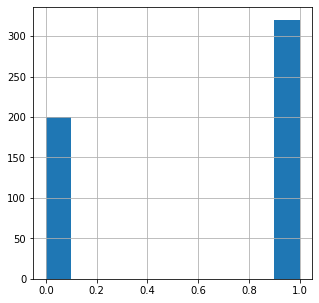

In [17]:
data_df['class'].hist(figsize = (5,5))

### Deskriptivna analiza

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

### Measure of Center: Mean and Median

In [19]:
mean = data_df.mean()
print(mean)

Age                   48.028846
Gender                 0.630769
Polyuria               0.496154
Polydipsia             0.448077
sudden weight loss     0.417308
weakness               0.586538
Polyphagia             0.455769
Genital thrush         0.223077
visual blurring        0.448077
Itching                0.486538
Irritability           0.242308
delayed healing        0.459615
partial paresis        0.430769
muscle stiffness       0.375000
Alopecia               0.344231
Obesity                0.169231
class                  0.615385
dtype: float64


In [20]:
median = data_df.median()
print(median)

Age                   47.5
Gender                 1.0
Polyuria               0.0
Polydipsia             0.0
sudden weight loss     0.0
weakness               1.0
Polyphagia             0.0
Genital thrush         0.0
visual blurring        0.0
Itching                0.0
Irritability           0.0
delayed healing        0.0
partial paresis        0.0
muscle stiffness       0.0
Alopecia               0.0
Obesity                0.0
class                  1.0
dtype: float64


### Measures of Variabillity

#### Standard Deviation

In [21]:
std_deviation = data_df.std()
print(std_deviation)

Age                   12.151466
Gender                 0.483061
Polyuria               0.500467
Polydipsia             0.497776
sudden weight loss     0.493589
weakness               0.492928
Polyphagia             0.498519
Genital thrush         0.416710
visual blurring        0.497776
Itching                0.500300
Irritability           0.428892
delayed healing        0.498846
partial paresis        0.495661
muscle stiffness       0.484589
Alopecia               0.475574
Obesity                0.375317
class                  0.486973
dtype: float64


#### Variance

In [22]:
variance = data_df.var()
print(variance)

Age                   147.658126
Gender                  0.233348
Polyuria                0.250467
Polydipsia              0.247780
sudden weight loss      0.243631
weakness                0.242978
Polyphagia              0.248522
Genital thrush          0.173648
visual blurring         0.247780
Itching                 0.250300
Irritability            0.183948
delayed healing         0.248848
partial paresis         0.245680
muscle stiffness        0.234827
Alopecia                0.226171
Obesity                 0.140863
class                   0.237142
dtype: float64


#### Skewness 
##### Na koju stranu je iskrivljenje, 0 je normalna distribucija

In [23]:
skewness = data_df.skew()
print(skewness)

Age                   0.329359
Gender               -0.543509
Polyuria              0.015430
Polydipsia            0.209426
sudden weight loss    0.336359
weakness             -0.352476
Polyphagia            0.178134
Genital thrush        1.334223
visual blurring       0.209426
Itching               0.054022
Irritability          1.206305
delayed healing       0.162537
partial paresis       0.280426
muscle stiffness      0.517893
Alopecia              0.657608
Obesity               1.769420
class                -0.475715
dtype: float64


#### Summary

In [24]:
data_df.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribucija podataka - Graficki prikaz

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


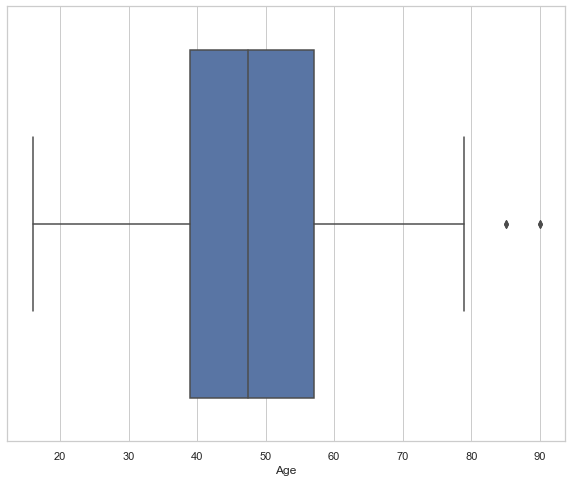

In [25]:
%matplotlib inline

sn.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sn.boxplot(x='Age', data=data_df, orient="v")

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

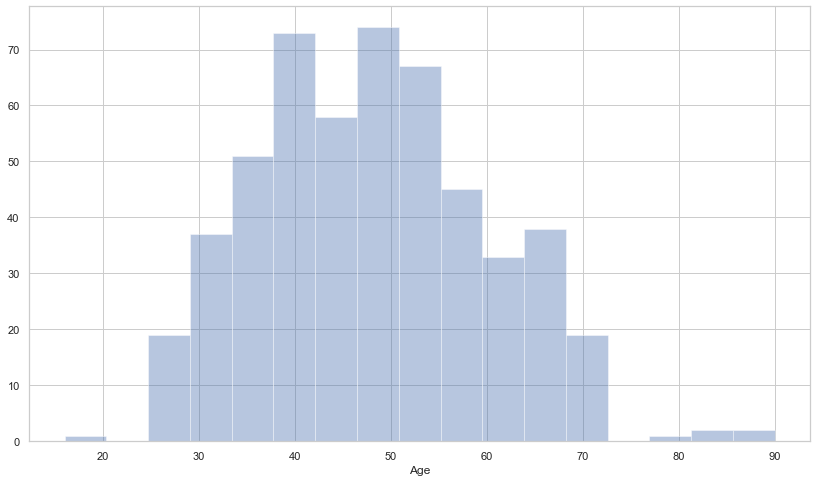

In [26]:
filter_data = data_df.dropna(subset=['Age'])
plt.figure(figsize=(14,8))
sn.distplot(filter_data['Age'], kde=False)

### Outlejeri - detekcija

In [27]:
feature = data_df["Age"]

q1, q3 = np.percentile(feature, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
outliers = np.where((feature > upper_bound) | (feature < lower_bound))

data_df.iloc[outliers[0]]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
101,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
102,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1
185,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
186,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1


## Balansiranost i resavanje problema:

<AxesSubplot:ylabel='class'>

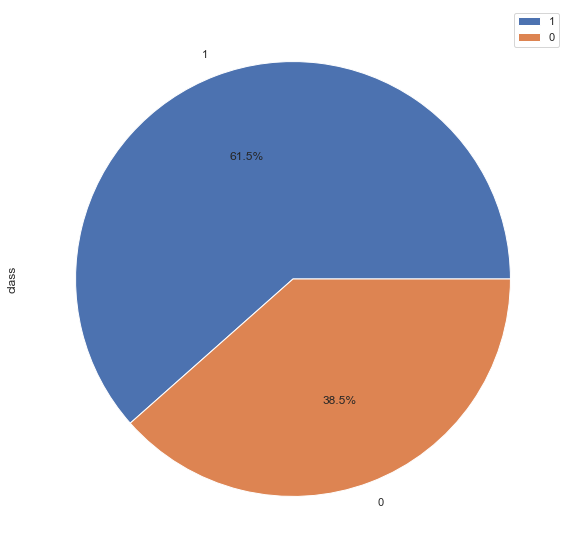

In [28]:
type_counts = data_df['class'].value_counts()
df2 = pd.DataFrame({'class': type_counts})
df2.plot.pie(y='class', figsize=(10,10), autopct='%1.1f%%')

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class'>

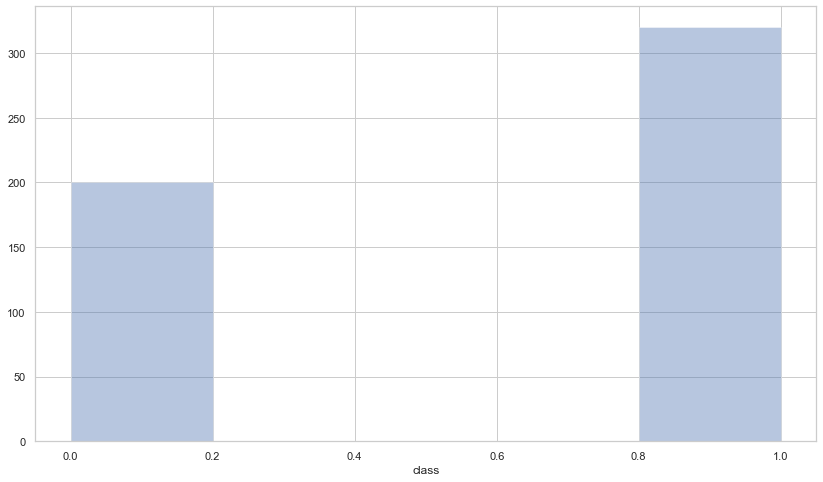

In [29]:
filter_data = data_df.dropna(subset=['class'])
plt.figure(figsize=(14,8))
sn.distplot(filter_data['class'], kde=False)

Negative:  200
Positive:  320


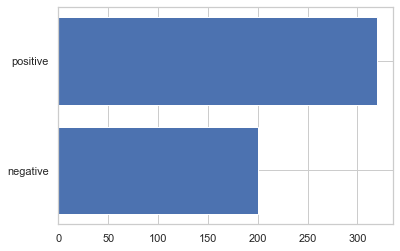

In [30]:
positive_count, negative_count = data_df['class'].value_counts()
plt.barh(["negative","positive"], [negative_count, positive_count])
print("Negative:  "+ str(negative_count))
print("Positive:  "+ str(positive_count))

## Underseampling

Negative:  200
Positive:  200


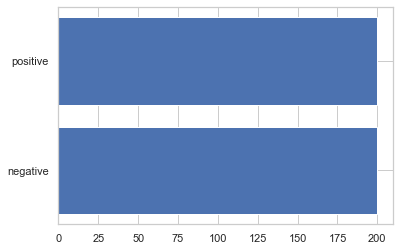

In [31]:
from sklearn.utils import resample

df_majority_US = data_df[data_df['class'] == 1]
df_minority_US = data_df[data_df['class'] == 0]

df_majority_undersampled = resample(df_majority_US, replace = False, n_samples = negative_count, random_state = 0)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_US])
undersampled_positive_count, undersampled_negative_count = df_undersampled['class'].value_counts()

plt.barh(["negative","positive"], [undersampled_negative_count, undersampled_positive_count])
print("Negative:  "+ str(undersampled_negative_count))
print("Positive:  "+ str(undersampled_positive_count))

## Upseampling

NEGATIVE:  320
POSITIVE:  320


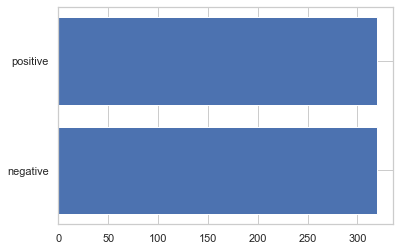

In [32]:
df_majority_OS = data_df[data_df['class'] == 1]
df_minority_OS = data_df[data_df['class'] == 0]

df_minority_upsampled = resample(df_minority_OS, replace=True, n_samples=positive_count, random_state=0)
df_upsampled = pd.concat([df_majority_OS, df_minority_upsampled])
oversampled_positive_count, oversampled_negative_count = df_upsampled['class'].value_counts()

plt.barh(["negative","positive"], [oversampled_negative_count, oversampled_positive_count])
print("NEGATIVE:  "+ str(oversampled_negative_count))
print("POSITIVE:  "+ str(oversampled_positive_count))

## Pitanja za 7.12.2022

### 1. Sta je bolje upseampling ili underseampling? 
     Mozda upseampling jer ima vise podataka obzirom da je dataset svakako mali?
### 2. Ideja: Dalja testiranja i projekat raditi sa nebalansiranim, balansiranim up i balansiranim under, pa da vidimo sta se dogadja?
### 3. Outlejeri, da li je u redu? Ako jeste, posto ih je relativno malo da li je u redu da ostanu u podacima?

#### Dalju analizu probati i sa nebalansiranim i balansiranim (up i down), takodje isprobati i sa i bez outlier-a.
#### --------------------------------------------------------------------------------------------------------------------------------------------------------

### Test and Train data 80%:20%

In [33]:
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve, validation_curve

#### Nebalansirani podaci

In [34]:
X_imbalanced = data_df.drop("class", axis=1).values
y_imbalanced = data_df["class"].values

X_train_imbalanced ,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

#### Balansirani - Underseampling

In [35]:
X_undersampled = df_undersampled.drop("class",axis = 1).values
y_undersampled = df_undersampled["class"].values

X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

#### Balansirani - Upseampling

In [36]:
X_upsampled = df_upsampled.drop("class",axis = 1).values
y_upsampled = df_upsampled["class"].values

X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

#### Scikit-learn map - Choosing right Classificator
https://scikit-learn.org/stable/tutorial/machine_learning_map/

### Pomocne metode za evaluaciju

In [37]:
def evaluate_model(y_true_, y_pred_):
    accuracy = accuracy_score(y_true_, y_pred_)
    f1 = f1_score(y_true_, y_pred_)
    precision = precision_score(y_true_, y_pred_)
    recall = recall_score(y_true_, y_pred_)
    conf_matrix = confusion_matrix(y_true=y_true_, y_pred=y_pred_)
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    print("Accuracy : ", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Confuse matrix:")
    print(conf_matrix)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("True negative: ", TN)
    print("False negative: ", FN)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)

# Matrice konfuzije
def plot_conf_matrix(matrix):
    class_names=['N','P']

    # Create pandas dataframe
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

    # Create heatmap
    sn.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()    

# Plot AUC-ROC Curve
def auc_roc_plot(test, prediction):
    fpr, tpr, threshold = roc_curve(test, prediction)
    roc_auc = auc(fpr, tpr)

    plt.title('AUC-ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## LinearSVC

In [38]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import accuracy_score

### Nebalansirani

In [39]:
#[https://www.dataquest.io/blog/sci-kit-learn-tutorial/]
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(X_train_imbalanced, y_train_imbalanced).predict(X_test_imbalanced)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test_imbalanced, pred, normalize = True))

LinearSVC accuracy :  0.8461538461538461


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


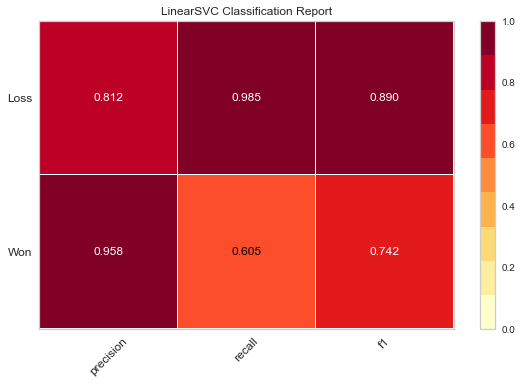

In [40]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])
visualizer.fit(X_train_imbalanced, y_train_imbalanced) # Fit the training data to the visualizer
visualizer.score(X_test_imbalanced, y_test_imbalanced) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [41]:
#Kros validacija

scaler = StandardScaler()
svc_model = LinearSVC()

# create a pipeline that standardizes, that runs LinearSVC
pipeline = make_pipeline(scaler, svc_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
svc_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(svc_cv_results_imbalanced)
print("Mean: ", svc_cv_results_imbalanced.mean())

[0.86538462 0.92307692 0.90384615 0.86538462 0.96153846 0.88461538
 0.98076923 0.92307692 0.94230769 0.98076923]
Mean:  0.923076923076923


### Balansirani (underseampling)

In [42]:
#[https://www.dataquest.io/blog/sci-kit-learn-tutorial/]
svc_model_undersampling = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model_undersampling.fit(X_train_undersampled, y_train_undersampled).predict(X_test_undersampled)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test_undersampled, pred, normalize = True))

LinearSVC accuracy :  0.9125


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


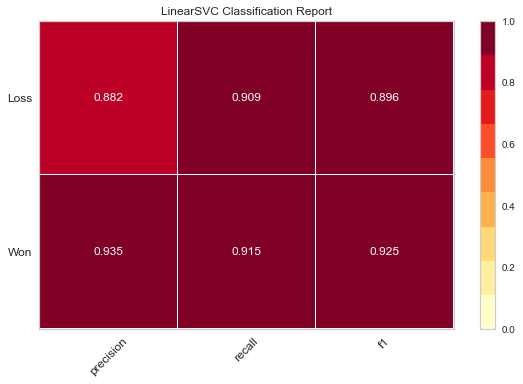

In [43]:
# Instantiate the classification model and visualizer
visualizer_undersampled = ClassificationReport(svc_model_undersampling, classes=['Won','Loss'])
visualizer_undersampled.fit(X_train_undersampled, y_train_undersampled) # Fit the training data to the visualizer
visualizer_undersampled.score(X_test_undersampled, y_test_undersampled) # Evaluate the model on the test data
g = visualizer_undersampled.poof() # Draw/show/poof the data

In [44]:
# Kros validacija
scaler = StandardScaler()
svc_model = LinearSVC()

# create a pipeline that standardizes, than runs LinearSVC
pipeline = make_pipeline(scaler, svc_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
svc_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(svc_cv_results_undersampled)
print("Mean: ", svc_cv_results_undersampled.mean())

[0.875 0.975 0.95  0.925 0.925 0.85  0.95  0.925 0.875 0.975]
Mean:  0.9225


### Balansirani (upseampling)

In [45]:
#[https://www.dataquest.io/blog/sci-kit-learn-tutorial/]
svc_model_upseampling = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model_upseampling.fit(X_train_upsampled, y_train_upsampled).predict(X_test_upsampled)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test_upsampled, pred, normalize = True))

LinearSVC accuracy :  0.890625


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


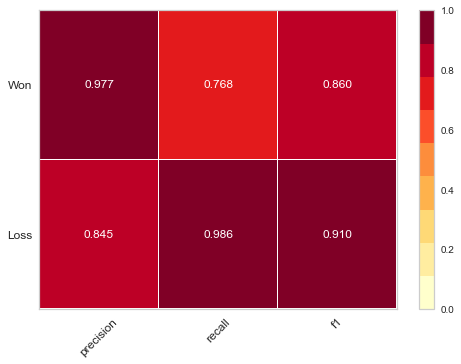

In [46]:
# Instantiate the classification model and visualizer
visualizer_upsampled = ClassificationReport(svc_model_upseampling, classes=['Won','Loss'])
visualizer_upsampled.fit(X_train_upsampled, y_train_upsampled) # Fit the training data to the visualizer
visualizer_upsampled.score(X_test_upsampled, y_test_upsampled) # Evaluate the model on the test data
g = visualizer_undersampled.poof() # Draw/show/poof the data

In [47]:
# Kros validacija
scaler = StandardScaler()
svc_model = LinearSVC()

# create a pipeline that standardizes, than runs LinearSVC
pipeline = make_pipeline(scaler, svc_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
svc_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(svc_cv_results_upsampled)
print("Mean: ", svc_cv_results_upsampled.mean())

[0.890625 0.90625  0.953125 0.890625 0.953125 0.9375   0.9375   0.953125
 0.84375  0.953125]
Mean:  0.921875


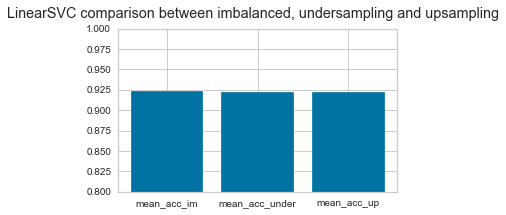

In [48]:
### Kros validacija, poredjenje 

plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [svc_cv_results_imbalanced.mean(), svc_cv_results_undersampled.mean(), svc_cv_results_upsampled.mean()])
plt.suptitle('LinearSVC comparison between imbalanced, undersampling and upsampling')
plt.show()

## KNearest Neighboars

### Nebalansirani

In [49]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=2)
#Train the algorithm
neigh.fit(X_train_imbalanced, y_train_imbalanced)
# predict the response
pred = neigh.predict(X_test_imbalanced)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test_imbalanced, pred))

KNeighbors accuracy score :  0.875


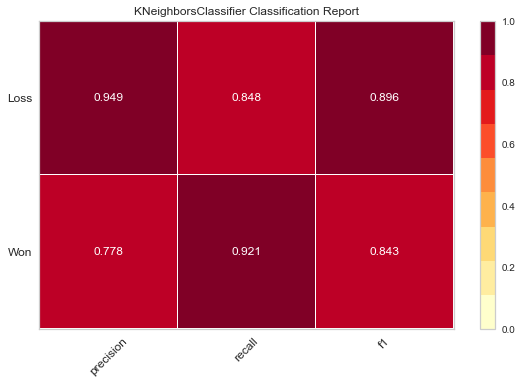

In [50]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])
visualizer.fit(X_train_imbalanced, y_train_imbalanced) # Fit the training data to the visualizer
visualizer.score(X_test_imbalanced, y_test_imbalanced) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [51]:
#Kros validacija

scaler = StandardScaler()
knn_classifier = KNeighborsClassifier(n_neighbors=5)

pipeline = make_pipeline(scaler, knn_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
knn_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(knn_cv_results_imbalanced)
print("Mean: ", knn_cv_results_imbalanced.mean())

[0.84615385 0.98076923 0.94230769 0.90384615 0.94230769 0.92307692
 0.92307692 0.94230769 0.98076923 0.90384615]
Mean:  0.9288461538461539


### Balansirani (underseampling)

In [52]:
#create object of the lassifier
neigh_undersampled = KNeighborsClassifier(n_neighbors=2)
#Train the algorithm
neigh_undersampled.fit(X_train_undersampled, y_train_undersampled)
# predict the response
pred = neigh_undersampled.predict(X_test_undersampled)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test_undersampled, pred))

KNeighbors accuracy score :  0.8375


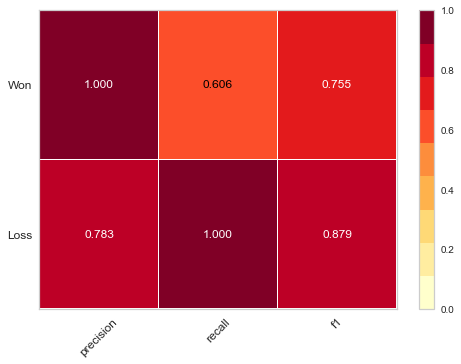

In [53]:
# Instantiate the classification model and visualizer
visualizer_undersampled = ClassificationReport(neigh_undersampled, classes=['Won','Loss'])
visualizer_undersampled.fit(X_train_undersampled, y_train_undersampled) # Fit the training data to the visualizer
visualizer_undersampled.score(X_test_undersampled, y_test_undersampled) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [54]:
scaler = StandardScaler()
knn_classifier = KNeighborsClassifier(n_neighbors=5)

pipeline = make_pipeline(scaler, knn_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
knn_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(knn_cv_results_undersampled)
print("Mean: ", knn_cv_results_undersampled.mean())

[0.95  0.95  0.95  0.85  0.975 0.875 0.925 0.95  0.875 0.975]
Mean:  0.9275


### Balansirani (upsampling)

In [55]:
#create object of the lassifier
neigh_upsampled = KNeighborsClassifier(n_neighbors=2)
#Train the algorithm
neigh_upsampled.fit(X_train_upsampled, y_train_upsampled)
# predict the response
pred = neigh_upsampled.predict(X_test_upsampled)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test_upsampled, pred))

KNeighbors accuracy score :  0.9296875


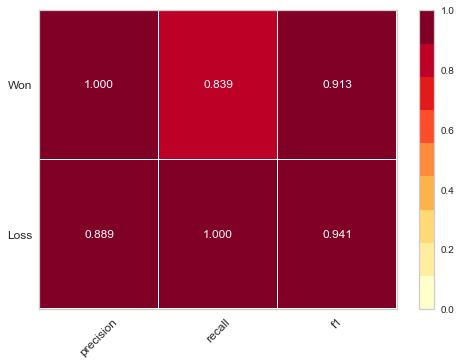

In [56]:
# Instantiate the classification model and visualizer
visualizer_upsampled = ClassificationReport(neigh_upsampled, classes=['Won','Loss'])
visualizer_upsampled.fit(X_train_upsampled, y_train_upsampled) # Fit the training data to the visualizer
visualizer_upsampled.score(X_test_upsampled, y_test_upsampled) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [57]:
# Kros validacija
scaler = StandardScaler()
knn_classifier = KNeighborsClassifier(n_neighbors=5) # 3

pipeline = make_pipeline(scaler, knn_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
knn_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(knn_cv_results_upsampled)
print("Mean: ", knn_cv_results_upsampled.mean())

[0.90625  0.984375 0.953125 0.96875  0.96875  0.953125 0.9375   0.96875
 0.90625  0.921875]
Mean:  0.946875


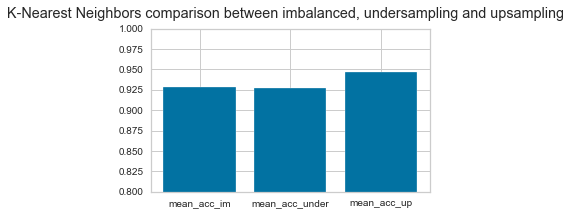

In [58]:
### Kros validacija, poredjenje 
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [knn_cv_results_imbalanced.mean(), knn_cv_results_undersampled.mean(), knn_cv_results_upsampled.mean()])
plt.suptitle('K-Nearest Neighbors comparison between imbalanced, undersampling and upsampling')
plt.show()

## Naive Bayes

### Nebalansirani

In [59]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_train_imbalanced, y_train_imbalanced).predict(X_test_imbalanced)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test_imbalanced, pred, normalize = True))

Naive-Bayes accuracy :  0.8942307692307693


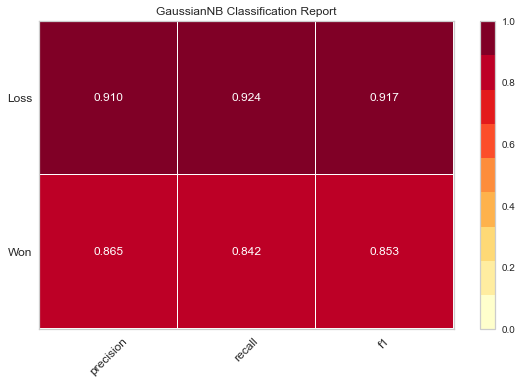

In [60]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])
visualizer.fit(X_train_imbalanced, y_train_imbalanced) # Fit the training data to the visualizer
visualizer.score(X_test_imbalanced, y_test_imbalanced) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [61]:
#Kros validacija
scaler = StandardScaler()
nb_model = GaussianNB()

# create a pipeline that standardizes, that runs Naive bayes
pipeline = make_pipeline(scaler, nb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
nb_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(nb_cv_results_imbalanced)
print("Mean: ", nb_cv_results_imbalanced.mean())

[0.84615385 0.90384615 0.86538462 0.86538462 0.88461538 0.90384615
 0.90384615 0.88461538 0.90384615 0.96153846]
Mean:  0.8923076923076924


### Balansirani (underseampling)

In [62]:
#create an object of the type GaussianNB
gnb_underseampling = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb_underseampling.fit(X_train_undersampled, y_train_undersampled).predict(X_test_undersampled)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test_undersampled, pred, normalize = True))

Naive-Bayes accuracy :  0.9125


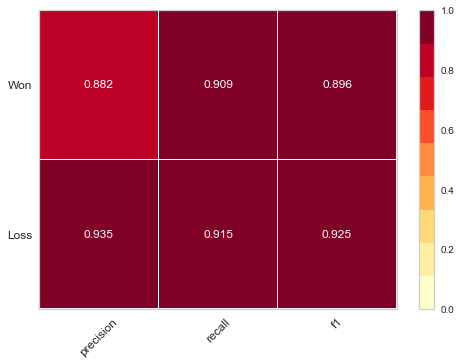

In [63]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer_undesampled = ClassificationReport(gnb_underseampling, classes=['Won','Loss'])
visualizer_undesampled.fit(X_train_undersampled, y_train_undersampled) # Fit the training data to the visualizer
visualizer_undesampled.score(X_test_undersampled, y_test_undersampled) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [64]:
scaler = StandardScaler()
nb_model = GaussianNB()

# create a pipeline that standardizes, that runs Naive bayes
pipeline = make_pipeline(scaler, nb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
nb_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(nb_cv_results_undersampled)
print("Mean: ", nb_cv_results_undersampled.mean())

[0.95  0.95  0.9   0.775 0.85  0.925 0.95  0.95  0.825 0.8  ]
Mean:  0.8875


### Balansirani (upseampling)

In [65]:
#create an object of the type GaussianNB
gnb_upsampling = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb_upsampling.fit(X_train_upsampled, y_train_upsampled).predict(X_test_upsampled)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test_upsampled, pred, normalize = True))

Naive-Bayes accuracy :  0.8671875


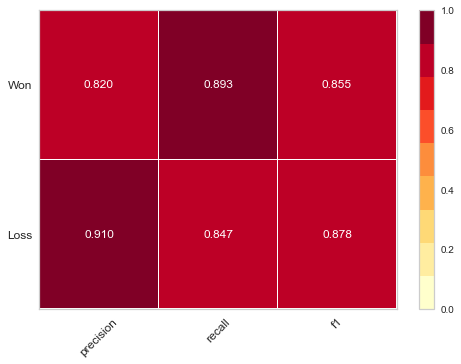

In [66]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer_upsampled = ClassificationReport(gnb_upsampling, classes=['Won','Loss'])
visualizer_upsampled.fit(X_train_upsampled, y_train_upsampled) # Fit the training data to the visualizer
visualizer_upsampled.score(X_test_upsampled, y_test_upsampled) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [67]:
scaler = StandardScaler()
nb_model = GaussianNB()

# create a pipeline that standardizes, that runs Naive bayes
pipeline = make_pipeline(scaler, nb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
nb_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(nb_cv_results_upsampled)
print("Mean: ", nb_cv_results_upsampled.mean())

[0.8125   0.875    0.9375   0.828125 0.875    0.859375 0.921875 0.921875
 0.875    0.90625 ]
Mean:  0.88125


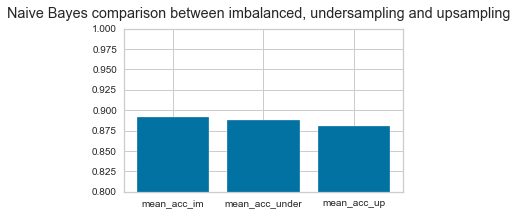

In [68]:
### Kros validacija, poredjenje 
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [nb_cv_results_imbalanced.mean(), nb_cv_results_undersampled.mean(), nb_cv_results_upsampled.mean()])
plt.suptitle('Naive Bayes comparison between imbalanced, undersampling and upsampling')
plt.show()

## PITANJA 14.12.2022

Da odradimo kros validaciju za jos algoritama, pa da na osnovu najboljih odaberemo 2,3 koja daju najbolje vrednosti i sa njima radimo dublju analizu?

In [69]:
# Ukljuciti analizu f1 mere!!

### Logistic regression


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
#nebalansirano

scaler = StandardScaler()
lr_classifier = LogisticRegression()

pipeline = make_pipeline(scaler, lr_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lr_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(lr_cv_results_imbalanced)
print("Mean: ", lr_cv_results_imbalanced.mean())

[0.86538462 0.92307692 0.90384615 0.84615385 0.96153846 0.88461538
 0.98076923 0.92307692 0.96153846 0.98076923]
Mean:  0.923076923076923


In [73]:
#underseampling

scaler = StandardScaler()
lr_classifier = LogisticRegression()

pipeline = make_pipeline(scaler, lr_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lr_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(lr_cv_results_undersampled)
print("Mean: ", lr_cv_results_undersampled.mean())

[0.925 0.975 0.95  0.925 0.925 0.85  0.975 0.925 0.875 0.975]
Mean:  0.9299999999999999


In [74]:
# upsampling

scaler = StandardScaler()
lr_classifier = LogisticRegression()

pipeline = make_pipeline(scaler, lr_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lr_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(lr_cv_results_upsampled)
print("Mean: ", lr_cv_results_upsampled.mean())

[0.890625 0.921875 0.953125 0.890625 0.9375   0.953125 0.9375   0.96875
 0.84375  0.953125]
Mean:  0.925


### poredjenje 

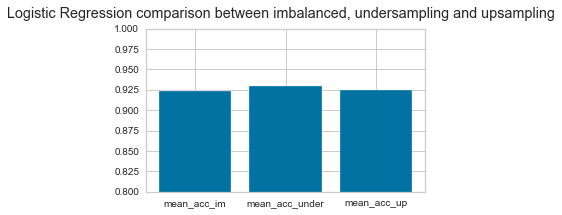

In [75]:
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [lr_cv_results_imbalanced.mean(), lr_cv_results_undersampled.mean(), lr_cv_results_upsampled.mean()])
plt.suptitle('Logistic Regression comparison between imbalanced, undersampling and upsampling')
plt.show()

### Decision tree

In [78]:
#nebalansirano

scaler = StandardScaler()
dt_classifier = DecisionTreeClassifier(random_state=0)

pipeline = make_pipeline(scaler, dt_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dt_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(dt_cv_results_imbalanced)
print("Mean: ", dt_cv_results_imbalanced.mean())

[0.92307692 0.98076923 0.98076923 0.94230769 0.94230769 0.90384615
 1.         0.98076923 0.88461538 0.98076923]
Mean:  0.9519230769230769


In [79]:
# undersampling

scaler = StandardScaler()
dt_classifier = DecisionTreeClassifier(random_state=0)

pipeline = make_pipeline(scaler, dt_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dt_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(dt_cv_results_undersampled)
print("Mean: ", dt_cv_results_undersampled.mean())

[0.975 0.975 0.95  0.925 0.925 0.9   0.95  0.975 0.975 0.975]
Mean:  0.9525


In [80]:
# upsampling

scaler = StandardScaler()
dt_classifier = DecisionTreeClassifier(random_state=0)

pipeline = make_pipeline(scaler, dt_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dt_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(dt_cv_results_upsampled)
print("Mean: ", dt_cv_results_upsampled.mean())

[0.953125 1.       1.       0.953125 0.984375 0.96875  0.984375 0.984375
 0.953125 1.      ]
Mean:  0.978125


#### Poredjenje Decision tree

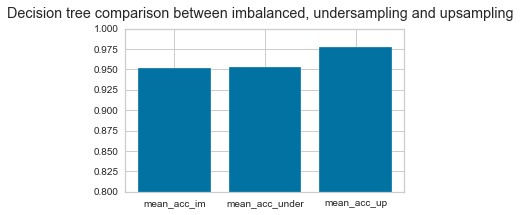

In [81]:
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [dt_cv_results_imbalanced.mean(), dt_cv_results_undersampled.mean(), dt_cv_results_upsampled.mean()])
plt.suptitle('Decision tree comparison between imbalanced, undersampling and upsampling')
plt.show()

### Random forest

In [82]:
#nebalansirsano

scaler = StandardScaler()
rf_model = RandomForestClassifier()

pipeline = make_pipeline(scaler, rf_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(rf_cv_results_imbalanced)
print("Mean: ", rf_cv_results_imbalanced.mean())

[0.96153846 0.98076923 0.98076923 0.96153846 0.96153846 0.96153846
 0.98076923 1.         0.96153846 1.        ]
Mean:  0.975


In [83]:
#undersampling

scaler = StandardScaler()
rf_model = RandomForestClassifier()

pipeline = make_pipeline(scaler, rf_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(rf_cv_results_undersampled)
print("Mean: ", rf_cv_results_undersampled.mean())

[1.    0.975 0.95  0.925 0.975 0.925 1.    0.975 0.95  1.   ]
Mean:  0.9674999999999999


In [84]:
#upsampling

scaler = StandardScaler()
rf_model = RandomForestClassifier()

pipeline = make_pipeline(scaler, rf_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(rf_cv_results_upsampled)
print("Mean: ", rf_cv_results_upsampled.mean())

[0.96875  1.       1.       0.96875  0.984375 0.96875  0.984375 1.
 0.9375   1.      ]
Mean:  0.98125


#### Poredjenje Random Forest

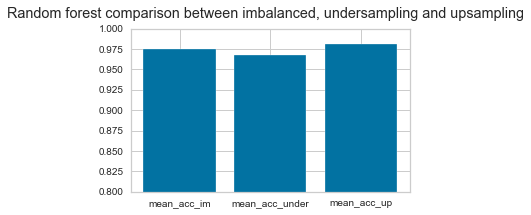

In [85]:
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [rf_cv_results_imbalanced.mean(), rf_cv_results_undersampled.mean(), rf_cv_results_upsampled.mean()])
plt.suptitle('Random forest comparison between imbalanced, undersampling and upsampling')
plt.show()

### Gradient Boost

In [86]:
#imbalanced

scaler = StandardScaler()
gb_model = GradientBoostingClassifier(learning_rate=0.1)

pipeline = make_pipeline(scaler, gb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gb_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(gb_cv_results_imbalanced)
print("Mean: ", gb_cv_results_imbalanced.mean())

[0.96153846 0.98076923 0.98076923 0.92307692 0.94230769 0.96153846
 0.98076923 1.         0.96153846 0.98076923]
Mean:  0.9673076923076922


In [87]:
#undersampling

scaler = StandardScaler()
gb_model = GradientBoostingClassifier(learning_rate=0.1)

pipeline = make_pipeline(scaler, gb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gb_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(gb_cv_results_undersampled)
print("Mean: ", gb_cv_results_undersampled.mean())

[0.95  0.975 0.95  0.95  0.975 0.95  0.95  0.975 0.925 1.   ]
Mean:  0.96


In [88]:
#upsampling

scaler = StandardScaler()
gb_model = GradientBoostingClassifier(learning_rate=0.1)

pipeline = make_pipeline(scaler, gb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gb_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(gb_cv_results_upsampled)
print("Mean: ", gb_cv_results_upsampled.mean())

[0.96875  1.       0.984375 0.953125 0.984375 0.96875  0.984375 1.
 0.9375   1.      ]
Mean:  0.978125


#### Poredjenje Gradient Boost

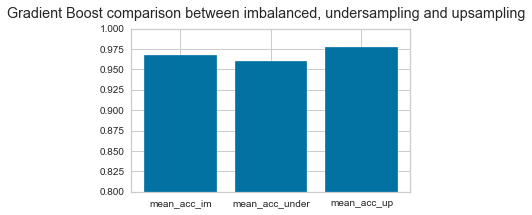

In [89]:
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [gb_cv_results_imbalanced.mean(), gb_cv_results_undersampled.mean(), gb_cv_results_upsampled.mean()])
plt.suptitle('Gradient Boost comparison between imbalanced, undersampling and upsampling')
plt.show()

### DummyClassifier

In [90]:
#imbalanced

scaler = StandardScaler()
dummy = DummyClassifier(strategy='stratified', random_state=1)

pipeline = make_pipeline(scaler, dummy)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dummy_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(dummy_cv_results_imbalanced)
print("Mean: ", dummy_cv_results_imbalanced.mean())

[0.57692308 0.57692308 0.57692308 0.65384615 0.5        0.53846154
 0.5        0.53846154 0.65384615 0.57692308]
Mean:  0.5692307692307692


In [91]:
#undersampling

scaler = StandardScaler()
dummy = DummyClassifier(strategy='stratified', random_state=1)

pipeline = make_pipeline(scaler, dummy)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dummy_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(dummy_cv_results_undersampled)
print("Mean: ", dummy_cv_results_undersampled.mean())

[0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65]
Mean:  0.6500000000000001


In [92]:
#upsampling

scaler = StandardScaler()
dummy = DummyClassifier(strategy='stratified', random_state=1)

pipeline = make_pipeline(scaler, dummy)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dummy_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(dummy_cv_results_upsampled)
print("Mean: ", dummy_cv_results_upsampled.mean())

[0.546875 0.546875 0.546875 0.546875 0.546875 0.546875 0.546875 0.546875
 0.546875 0.546875]
Mean:  0.546875


### Poredjenje algoritama

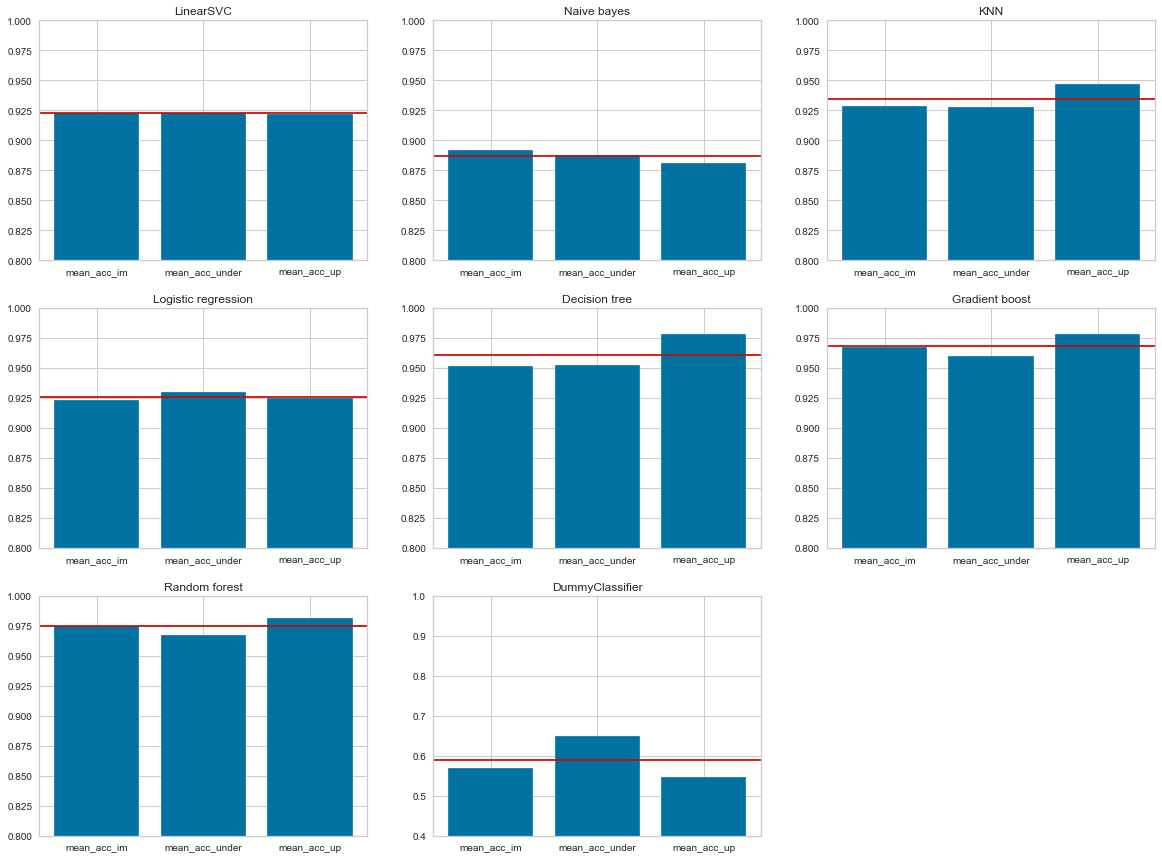

In [94]:
plt.figure(figsize=(20, 15))
plt.subplot(331)
plt.gca().set_title('LinearSVC')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [svc_cv_results_imbalanced.mean(), svc_cv_results_undersampled.mean(), svc_cv_results_upsampled.mean()])
plt.axhline(y = mean([svc_cv_results_imbalanced.mean(), svc_cv_results_undersampled.mean(), svc_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(332)
plt.gca().set_title('Naive bayes')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [nb_cv_results_imbalanced.mean(), nb_cv_results_undersampled.mean(), nb_cv_results_upsampled.mean()])
plt.axhline(y = mean([nb_cv_results_imbalanced.mean(), nb_cv_results_undersampled.mean(), nb_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(333)
plt.gca().set_title('KNN')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [knn_cv_results_imbalanced.mean(), knn_cv_results_undersampled.mean(), knn_cv_results_upsampled.mean()])
plt.axhline(y = mean([knn_cv_results_imbalanced.mean(), knn_cv_results_undersampled.mean(), knn_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')

plt.subplot(334)
plt.gca().set_title('Logistic regression')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [lr_cv_results_imbalanced.mean(), lr_cv_results_undersampled.mean(), lr_cv_results_upsampled.mean()])
plt.axhline(y = mean([lr_cv_results_imbalanced.mean(), lr_cv_results_undersampled.mean(), lr_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(335)
plt.gca().set_title('Decision tree')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [dt_cv_results_imbalanced.mean(), dt_cv_results_undersampled.mean(), dt_cv_results_upsampled.mean()])
plt.axhline(y = mean([dt_cv_results_imbalanced.mean(), dt_cv_results_undersampled.mean(), dt_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(336)
plt.gca().set_title('Gradient boost')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [gb_cv_results_imbalanced.mean(), gb_cv_results_undersampled.mean(), gb_cv_results_upsampled.mean()])
plt.axhline(y = mean([gb_cv_results_imbalanced.mean(), gb_cv_results_undersampled.mean(), gb_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')

plt.subplot(337)
plt.gca().set_title('Random forest')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [rf_cv_results_imbalanced.mean(), rf_cv_results_undersampled.mean(), rf_cv_results_upsampled.mean()])
plt.axhline(y = mean([rf_cv_results_imbalanced.mean(), rf_cv_results_undersampled.mean(), rf_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(338)
plt.gca().set_title('DummyClassifier')
plt.ylim(0.4, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [dummy_cv_results_imbalanced.mean(), dummy_cv_results_undersampled.mean(), dummy_cv_results_upsampled.mean()])
plt.axhline(y = mean([dummy_cv_results_imbalanced.mean(), dummy_cv_results_undersampled.mean(), dummy_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')

plt.show()